In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
import keras
from sklearn.model_selection import train_test_split
import cv2
import os


In [2]:

# Define paths to your image folders (replace with your paths)
train_data_dir = 'D:/Engineering/SEM6/PROJECTS/DeepLearning/FloW_IMG/training/images'
validation_data_dir = 'D:/Engineering/SEM6/PROJECTS/DeepLearning/FloW_IMG/test/images'

# Set image dimensions (adjust if your images are different)
img_width, img_height = 224, 224

# Data augmentation for training data (optional but helpful)
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Load and pre-process training and validation data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,  # Adjust batch size based on your GPU memory
    class_mode='categorical'  # Adjust for binary or multi-class classification
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [3]:

densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

for layer in densenet_model.layers:
  layer.trainable = False


NameError: name 'DenseNet121' is not defined

In [30]:
x = densenet_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)  
x = Dropout(0.5)(x)  
predictions = Dense(len(train_generator.classes), activation='softmax')(x) 

# Create the final model
model = Model(inputs=densenet_model.input, outputs=predictions)

# Compile the model (adjust optimizer and loss function as needed)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


NameError: name 'Model' is not defined

In [4]:
from ultralytics import YOLO
import ultralytics

# ultralytics.checks()

model = YOLO("yolov8n.yaml")

results = model.train(data = "config.yaml", epochs =1)



KeyboardInterrupt: 

In [5]:
import cv2
import os
import random as random
from PIL import Image
from pascal import annotation_from_xml
import xml.etree.ElementTree as ET
import yaml
import random as random
import shutil
import matplotlib.pyplot as plt
import torch
import xml.etree.ElementTree as ET

In [32]:
# Function to convert XML annotations to YOLO format
def convert_xml_to_yolo(xml_folder, output_folder, class_mapping):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Loop through each XML file in the XML folder
    for xml_file in os.listdir(xml_folder):
        if xml_file.endswith('.xml'):
            xml_path = os.path.join(xml_folder, xml_file)
            # Parse XML
            tree = ET.parse(xml_path)
            root = tree.getroot()

            # Get image width and height
            size = root.find('size')
            width = int(size.find('width').text)
            height = int(size.find('height').text)

            # Create output file
            txt_file = os.path.splitext(xml_file)[0] + '.txt'
            txt_path = os.path.join(output_folder, txt_file)

            # Open output file
            with open(txt_path, 'w') as txt_file:
                # Loop through each object in XML
                for obj in root.findall('object'):
                    class_name = obj.find('name').text
                    # Check if class exists in class_mapping
                    if class_name in class_mapping:
                        class_id = class_mapping[class_name]
                        bbox = obj.find('bndbox')
                        xmin = float(bbox.find('xmin').text)
                        ymin = float(bbox.find('ymin').text)
                        xmax = float(bbox.find('xmax').text)
                        ymax = float(bbox.find('ymax').text)

                        # Convert bounding box coordinates to YOLO format
                        x_center = (xmin + xmax) / (2 * width)
                        y_center = (ymin + ymax) / (2 * height)
                        bbox_width = (xmax - xmin) / width
                        bbox_height = (ymax - ymin) / height

                        # Write to output file in YOLO format
                        txt_file.write(f"{class_id} {x_center} {y_center} {bbox_width} {bbox_height}\n")

# Example usage
xml_folder = 'D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\dataset_test\Annotations'   # Path to folder containing XML annotations
output_folder = 'D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\dataset_test\labels'  # Output folder for YOLO annotations
class_mapping = {'bottle':0, 'carton':1, 'plastic':2, 'paper':3}  # Mapping of class names to class IDs


convert_xml_to_yolo(xml_folder, output_folder, class_mapping)



New https://pypi.org/project/ultralytics/8.1.40 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.38 🚀 Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/Engineering/SEM6/PROJECTS/DeepLearning/FloW_IMG/config.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,


train: Scanning D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\training\labels...:   0%|          | 0/1200 [00:00<?, ?it/s]
train: Scanning D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\training\labels... 0 images, 582 backgrounds, 0 corrupt:  48%|████▊     | 582/1200 [00:00<00:00, 5649.06it/s]
train: Scanning D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\training\labels... 0 images, 1200 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:00<00:00, 6113.54it/s]

val: Scanning D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\test\labels...:   0%|          | 0/800 [00:00<?, ?it/s]
val: Scanning D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\test\labels... 0 images, 638 backgrounds, 0 corrupt:  80%|███████▉  | 638/800 [00:00<00:00, 6365.27it/s]
val: Scanning D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\test\labels... 0 images, 800 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<00:00, 6595.58it/s]

  0%|          | 0/75 [00:00<?, ?it/s]
      1/100  

New https://pypi.org/project/ultralytics/8.1.40 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.38 🚀 Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/Engineering/SEM6/PROJECTS/DeepLearning/FloW_IMG/config.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None


train: Scanning D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\training\labels.cache... 0 images, 1200 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:00<?, ?it/s]
train: Scanning D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\training\labels.cache... 0 images, 1200 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:00<?, ?it/s]

val: Scanning D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\test\labels.cache... 0 images, 800 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
val: Scanning D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\test\labels.cache... 0 images, 800 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]
      1/100         0G          0      120.6          0          0        640:   0%|          | 0/75 [00:05<?, ?it/s]
      1/100         0G          0      120.6          0          0        640:   1%|▏         | 1/75 [00:05<07:06,  5.77s/it]
      1/100         0G          

In [ ]:

#yolov8s
from ultralytics import YOLO

# Load a model

model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data=r"C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\data.yaml", epochs=40)  # train the model
metrics = model.val()  # evaluate model performance on the validation set


New https://pypi.org/project/ultralytics/8.3.25 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.18  Python-3.12.3 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train40, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retin

train: Scanning C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\train\labels.cache... 1445 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1445/1445 [00:00<?, ?it/s]
val: Scanning C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\val\labels.cache... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<?, ?it/s]


Plotting labels to runs\detect\train40\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train40
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      7.25G      2.114      3.916      1.046         21        640: 100%|██████████| 91/91 [00:25<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.72it/s]

                   all        301       1042      0.583      0.365      0.418      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      7.16G      1.767      1.327      0.957         19        640: 100%|██████████| 91/91 [00:27<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

                   all        301       1042      0.646      0.455      0.499      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      7.13G      1.841       1.27     0.9636         47        640: 100%|██████████| 91/91 [00:25<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.87it/s]

                   all        301       1042       0.67      0.457      0.506      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      7.12G      1.757      1.155     0.9576         31        640: 100%|██████████| 91/91 [00:24<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

                   all        301       1042      0.622      0.468      0.511      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40       7.1G      1.799      1.096     0.9639         37        640: 100%|██████████| 91/91 [00:25<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.70it/s]

                   all        301       1042      0.733      0.487      0.568      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      7.16G       1.73      1.046     0.9455         20        640: 100%|██████████| 91/91 [00:26<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.71it/s]

                   all        301       1042      0.675      0.508      0.574      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40       7.1G      1.677       1.01     0.9414         31        640: 100%|██████████| 91/91 [00:23<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]

                   all        301       1042      0.675      0.529      0.577      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      7.12G      1.656     0.9955     0.9334         15        640: 100%|██████████| 91/91 [00:23<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.87it/s]

                   all        301       1042      0.698       0.54      0.599      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      7.13G      1.638     0.9409     0.9292         24        640: 100%|██████████| 91/91 [00:23<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

                   all        301       1042      0.703      0.492      0.572      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      7.16G      1.668     0.9533      0.931         37        640: 100%|██████████| 91/91 [00:26<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.73it/s]

                   all        301       1042       0.69      0.502      0.592      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40       7.1G      1.617     0.9317      0.935         34        640: 100%|██████████| 91/91 [00:25<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.73it/s]

                   all        301       1042      0.756      0.599      0.662      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      7.12G      1.629     0.9121      0.914         21        640: 100%|██████████| 91/91 [00:23<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.02it/s]

                   all        301       1042      0.795      0.603       0.68      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40       7.1G      1.573     0.8589     0.9049         54        640: 100%|██████████| 91/91 [00:23<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.11it/s]

                   all        301       1042      0.734      0.596      0.666      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      7.17G       1.54      0.834     0.9116         22        640: 100%|██████████| 91/91 [00:23<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.14it/s]

                   all        301       1042      0.785      0.627      0.709      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      7.11G      1.528     0.8351     0.9019         35        640: 100%|██████████| 91/91 [00:23<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.06it/s]

                   all        301       1042      0.764      0.616      0.682      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      7.13G      1.561     0.8163     0.8991         23        640: 100%|██████████| 91/91 [00:23<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.13it/s]

                   all        301       1042      0.779      0.613      0.693      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40       7.1G      1.518     0.8074     0.9044         23        640: 100%|██████████| 91/91 [00:22<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.79it/s]

                   all        301       1042      0.794      0.646      0.717      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      7.09G      1.505     0.8021      0.892         21        640: 100%|██████████| 91/91 [00:23<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.85it/s]

                   all        301       1042        0.8      0.628      0.702      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40       7.1G      1.522     0.8011      0.912         22        640: 100%|██████████| 91/91 [00:23<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.71it/s]

                   all        301       1042      0.783      0.649      0.717       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      7.13G      1.491     0.8029     0.8971         20        640: 100%|██████████| 91/91 [00:23<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.07it/s]

                   all        301       1042      0.798      0.629      0.719      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40       7.1G      1.467     0.7637     0.8902         46        640: 100%|██████████| 91/91 [00:23<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.99it/s]

                   all        301       1042      0.799       0.67       0.73      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      7.14G      1.403     0.7406      0.891         45        640: 100%|██████████| 91/91 [00:23<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.91it/s]

                   all        301       1042      0.793      0.675      0.736      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      7.11G      1.482     0.7449     0.8919         24        640: 100%|██████████| 91/91 [00:23<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.00it/s]

                   all        301       1042      0.781      0.654      0.721      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      7.13G      1.423     0.7177     0.8832         18        640: 100%|██████████| 91/91 [00:23<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.47it/s]

                   all        301       1042      0.845      0.658       0.76      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      7.11G       1.39     0.7088     0.8857         23        640: 100%|██████████| 91/91 [00:23<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.91it/s]

                   all        301       1042      0.842        0.7      0.772      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      7.09G      1.425     0.7056     0.8753         22        640: 100%|██████████| 91/91 [00:23<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.65it/s]

                   all        301       1042      0.841       0.66      0.759      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      7.11G      1.356     0.6824     0.8723         23        640: 100%|██████████| 91/91 [00:23<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.46it/s]

                   all        301       1042      0.837      0.682      0.765      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      7.13G      1.396      0.691      0.873         13        640: 100%|██████████| 91/91 [00:32<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]

                   all        301       1042      0.864      0.681      0.777      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      7.11G      1.357     0.6703     0.8716         28        640: 100%|██████████| 91/91 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

                   all        301       1042      0.842      0.706      0.787        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      7.13G      1.324      0.643     0.8625         30        640: 100%|██████████| 91/91 [00:28<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.73it/s]

                   all        301       1042      0.847      0.706      0.787      0.415


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      7.07G      1.361     0.6605     0.8919         57        640:  16%|█▋        | 15/91 [02:32<11:47,  9.31s/it]

yolov8m

In [2]:
from ultralytics import YOLO

# Load a model

model = YOLO(r"D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\runs\detect\train36\weights\last.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(resume=True)  # train the model
metrics = model.val()  # evaluate model performance on the validation set


New https://pypi.org/project/ultralytics/8.2.2 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.44  Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\runs\detect\train36\weights\last.pt, data=C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train36, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\runs\detect\train36\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_d

train: Scanning C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\train\labels.cache... 1445 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1445/1445 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\val\labels.cache... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<?, ?it/s]

Plotting labels to runs\detect\train36\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Resuming training D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\runs\detect\train36\weights\last.pt from epoch 13 to 40 total epochs
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train36
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40         0G      1.791      1.116      1.006         16        640: 100%|██████████| 91/91 [25:31<00:00, 16.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:09<00:00,  6.90s/it]

                   all        301       1042      0.591      0.245      0.284      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40         0G      1.587     0.9165     0.9381         23        640: 100%|██████████| 91/91 [25:25<00:00, 16.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:09<00:00,  6.97s/it]

                   all        301       1042      0.773      0.583      0.664      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40         0G       1.56      0.896     0.9225         31        640: 100%|██████████| 91/91 [25:31<00:00, 16.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:09<00:00,  6.95s/it]

                   all        301       1042      0.703      0.534      0.604      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40         0G      1.572     0.8883     0.9186         22        640: 100%|██████████| 91/91 [25:28<00:00, 16.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:09<00:00,  6.91s/it]

                   all        301       1042       0.74      0.599      0.668      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40         0G       1.57     0.8616     0.9193         27        640: 100%|██████████| 91/91 [25:32<00:00, 16.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:09<00:00,  6.91s/it]

                   all        301       1042      0.734      0.619       0.68       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40         0G      1.499     0.8059     0.9098         15        640: 100%|██████████| 91/91 [25:10<00:00, 16.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:09<00:00,  6.93s/it]

                   all        301       1042      0.776      0.606      0.694      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40         0G      1.457     0.7689     0.9036         16        640: 100%|██████████| 91/91 [25:50<00:00, 17.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:08<00:00,  6.88s/it]

                   all        301       1042       0.81      0.622      0.728      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40         0G      1.478     0.7818     0.8898         25        640: 100%|██████████| 91/91 [24:59<00:00, 16.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:08<00:00,  6.86s/it]

                   all        301       1042      0.757      0.655      0.733      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40         0G      1.452     0.7479     0.9047         26        640: 100%|██████████| 91/91 [24:56<00:00, 16.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:07<00:00,  6.76s/it]

                   all        301       1042      0.819      0.631      0.733       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40         0G      1.463     0.7419     0.8996         30        640: 100%|██████████| 91/91 [24:46<00:00, 16.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:07<00:00,  6.76s/it]

                   all        301       1042        0.8       0.67      0.742      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40         0G      1.444     0.7372       0.89         13        640: 100%|██████████| 91/91 [25:09<00:00, 16.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:07<00:00,  6.78s/it]

                   all        301       1042      0.809      0.681      0.764       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40         0G      1.401     0.7164     0.8938         33        640: 100%|██████████| 91/91 [24:21<00:00, 16.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:06<00:00,  6.67s/it]

                   all        301       1042      0.867      0.683      0.769      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40         0G      1.448     0.7384     0.8944         28        640: 100%|██████████| 91/91 [24:13<00:00, 15.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:06<00:00,  6.62s/it]

                   all        301       1042      0.744      0.647      0.717      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40         0G      1.434     0.7378     0.8877         24        640: 100%|██████████| 91/91 [24:39<00:00, 16.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:07<00:00,  6.72s/it]

                   all        301       1042      0.813      0.681      0.758      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40         0G      1.388     0.7025     0.8873         29        640: 100%|██████████| 91/91 [24:14<00:00, 15.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:08<00:00,  6.85s/it]

                   all        301       1042      0.815      0.674       0.76      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40         0G      1.396     0.6918     0.8766         22        640: 100%|██████████| 91/91 [23:58<00:00, 15.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:08<00:00,  6.86s/it]

                   all        301       1042      0.814       0.68      0.767      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40         0G      1.388     0.6968     0.8786         18        640: 100%|██████████| 91/91 [23:56<00:00, 15.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:07<00:00,  6.77s/it]

                   all        301       1042      0.865      0.699      0.786      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40         0G      1.347     0.6799     0.8735         26        640: 100%|██████████| 91/91 [24:04<00:00, 15.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:09<00:00,  6.93s/it]

                   all        301       1042      0.825       0.69      0.779      0.408


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40         0G      1.405     0.6995     0.8849         23        640: 100%|██████████| 91/91 [23:51<00:00, 15.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:08<00:00,  6.84s/it]

                   all        301       1042      0.825      0.695      0.774      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40         0G      1.352     0.6841     0.8833         19        640: 100%|██████████| 91/91 [23:50<00:00, 15.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:08<00:00,  6.80s/it]

                   all        301       1042      0.874      0.681      0.782      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40         0G      1.356     0.6765      0.888          9        640: 100%|██████████| 91/91 [23:58<00:00, 15.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:07<00:00,  6.76s/it]

                   all        301       1042      0.849      0.707      0.791      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40         0G      1.347     0.6485     0.8735         17        640: 100%|██████████| 91/91 [24:23<00:00, 16.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:09<00:00,  6.90s/it]

                   all        301       1042      0.858      0.713      0.802      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40         0G      1.339     0.6355     0.8803         14        640: 100%|██████████| 91/91 [24:28<00:00, 16.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:08<00:00,  6.90s/it]

                   all        301       1042       0.86       0.72      0.815      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40         0G      1.312     0.6169     0.8732          7        640: 100%|██████████| 91/91 [24:22<00:00, 16.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:08<00:00,  6.90s/it]

                   all        301       1042      0.847      0.725      0.815      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40         0G      1.291      0.623     0.8727         18        640: 100%|██████████| 91/91 [24:30<00:00, 16.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:08<00:00,  6.85s/it]

                   all        301       1042      0.848      0.739      0.818      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40         0G      1.265      0.596      0.856         12        640: 100%|██████████| 91/91 [23:51<00:00, 15.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:08<00:00,  6.81s/it]

                   all        301       1042      0.844      0.729      0.815      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40         0G      1.236     0.5774     0.8537         13        640: 100%|██████████| 91/91 [24:17<00:00, 16.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:08<00:00,  6.83s/it]

                   all        301       1042      0.854      0.732      0.819      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40         0G      1.259     0.5825      0.858         10        640: 100%|██████████| 91/91 [24:26<00:00, 16.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:09<00:00,  6.93s/it]

                   all        301       1042      0.851      0.731       0.82      0.448



28 epochs completed in 12.052 hours.
Optimizer stripped from runs\detect\train36\weights\last.pt, 52.0MB
Optimizer stripped from runs\detect\train36\weights\best.pt, 52.0MB

Validating runs\detect\train36\weights\best.pt...
Ultralytics YOLOv8.1.44  Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:59<00:00,  5.99s/it]


                   all        301       1042      0.851      0.732       0.82      0.448
                bottle        301        575      0.874      0.664      0.804      0.431
                carton        301        220      0.845      0.744       0.81      0.454
               plastic        301        126      0.912      0.817       0.92      0.544
                 paper        301        121      0.773      0.702      0.744      0.362
Speed: 1.1ms preprocess, 176.1ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\train36
Ultralytics YOLOv8.1.44  Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\val\labels.cache... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:55<00:00,  2.94s/it]


                   all        301       1042      0.851      0.732       0.82      0.448
                bottle        301        575      0.874      0.664      0.804      0.431
                carton        301        220      0.845      0.744       0.81      0.454
               plastic        301        126      0.912      0.817       0.92      0.544
                 paper        301        121      0.773      0.702      0.744      0.362
Speed: 0.6ms preprocess, 162.9ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\train362


#YOLOv8x

In [1]:
from ultralytics import YOLO

# Load a model

model = YOLO(r"D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\runs\detect\train30\weights\last.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data=r"C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\data.yaml", epochs=40)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
metrics

New https://pypi.org/project/ultralytics/8.2.0 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.44  Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\runs\detect\train30\weights\last.pt, data=C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train32, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buff

train: Scanning C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\train\labels.cache... 1445 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1445/1445 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\val\labels.cache... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<?, ?it/s]


Plotting labels to runs\detect\train32\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train32
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40         0G      1.619     0.9619      0.925         16        640: 100%|██████████| 91/91 [59:05<00:00, 38.96s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:32<00:00, 15.23s/it]

                   all        301       1042      0.731      0.529      0.598      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40         0G      1.613     0.9792     0.9333         23        640: 100%|██████████| 91/91 [58:08<00:00, 38.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:30<00:00, 15.03s/it]

                   all        301       1042      0.752      0.502      0.599      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40         0G      1.636      1.036     0.9284         31        640: 100%|██████████| 91/91 [59:08<00:00, 39.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:30<00:00, 15.07s/it]

                   all        301       1042      0.702      0.445      0.513      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40         0G      1.699      1.078     0.9487         22        640: 100%|██████████| 91/91 [59:33<00:00, 39.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:31<00:00, 15.16s/it]

                   all        301       1042      0.736      0.523      0.601      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40         0G      1.673      1.037     0.9348         27        640: 100%|██████████| 91/91 [58:34<00:00, 38.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:33<00:00, 15.31s/it]

                   all        301       1042      0.758      0.516      0.593       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40         0G      1.639      1.007     0.9311         15        640: 100%|██████████| 91/91 [58:50<00:00, 38.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:28<00:00, 14.82s/it]

                   all        301       1042      0.756      0.517      0.604      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40         0G      1.588     0.9328     0.9251         16        640: 100%|██████████| 91/91 [59:32<00:00, 39.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:31<00:00, 15.13s/it]

                   all        301       1042      0.787      0.549      0.644      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40         0G      1.602     0.9265     0.9101         25        640: 100%|██████████| 91/91 [58:33<00:00, 38.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:29<00:00, 14.94s/it]

                   all        301       1042      0.797      0.536      0.627      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40         0G      1.588     0.8754     0.9259         26        640: 100%|██████████| 91/91 [58:31<00:00, 38.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:28<00:00, 14.87s/it]

                   all        301       1042      0.761      0.539       0.62      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40         0G      1.613     0.9017     0.9249         30        640: 100%|██████████| 91/91 [1:00:07<00:00, 39.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:30<00:00, 15.08s/it]

                   all        301       1042      0.772      0.617      0.695      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40         0G      1.591     0.8869     0.9123         13        640: 100%|██████████| 91/91 [59:52<00:00, 39.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:32<00:00, 15.23s/it]

                   all        301       1042       0.72      0.575      0.642      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40         0G      1.559     0.8623     0.9254         33        640: 100%|██████████| 91/91 [59:45<00:00, 39.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:31<00:00, 15.16s/it]

                   all        301       1042      0.737      0.579      0.664       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40         0G      1.572     0.8768      0.919         28        640: 100%|██████████| 91/91 [59:51<00:00, 39.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:31<00:00, 15.11s/it]

                   all        301       1042      0.774      0.578      0.667      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40         0G      1.557     0.8759      0.907         24        640: 100%|██████████| 91/91 [59:51<00:00, 39.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:30<00:00, 15.04s/it]

                   all        301       1042      0.769       0.63      0.702      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40         0G      1.493     0.8073     0.9029         29        640: 100%|██████████| 91/91 [58:49<00:00, 38.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:28<00:00, 14.83s/it]

                   all        301       1042      0.795      0.579      0.685      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40         0G      1.491     0.7965     0.8969         22        640: 100%|██████████| 91/91 [59:43<00:00, 39.38s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:31<00:00, 15.13s/it]

                   all        301       1042      0.817      0.633      0.722      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40         0G      1.507     0.7923     0.8993         18        640: 100%|██████████| 91/91 [1:00:15<00:00, 39.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:30<00:00, 15.04s/it]

                   all        301       1042      0.845      0.617      0.742      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40         0G      1.483     0.7791     0.8971         26        640: 100%|██████████| 91/91 [58:52<00:00, 38.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:28<00:00, 14.84s/it]

                   all        301       1042      0.806       0.63      0.722      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40         0G      1.462     0.7673     0.8975         28        640: 100%|██████████| 91/91 [58:51<00:00, 38.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:28<00:00, 14.88s/it]

                   all        301       1042      0.834      0.635      0.745      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40         0G       1.46     0.7568        0.9         31        640: 100%|██████████| 91/91 [1:00:12<00:00, 39.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:31<00:00, 15.15s/it]

                   all        301       1042      0.837      0.638      0.747      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40         0G      1.441     0.7525     0.8874         27        640: 100%|██████████| 91/91 [1:00:02<00:00, 39.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:30<00:00, 15.04s/it]

                   all        301       1042      0.861      0.679      0.777      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40         0G      1.405     0.7309     0.8807         26        640: 100%|██████████| 91/91 [58:51<00:00, 38.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:27<00:00, 14.78s/it]

                   all        301       1042      0.812      0.679      0.759      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40         0G       1.42     0.7268     0.8833         50        640: 100%|██████████| 91/91 [58:51<00:00, 38.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:29<00:00, 14.91s/it]

                   all        301       1042      0.845       0.68      0.757      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40         0G       1.43     0.7212      0.886         24        640: 100%|██████████| 91/91 [1:00:03<00:00, 39.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:30<00:00, 15.06s/it]

                   all        301       1042      0.867      0.692       0.78      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40         0G      1.395     0.6875     0.8888         39        640: 100%|██████████| 91/91 [58:59<00:00, 38.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:28<00:00, 14.83s/it]

                   all        301       1042      0.837      0.702      0.783       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40         0G      1.384     0.6868     0.8776         37        640: 100%|██████████| 91/91 [59:50<00:00, 39.46s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:29<00:00, 14.99s/it]

                   all        301       1042      0.866       0.72      0.798      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40         0G      1.329     0.6548     0.8785         17        640: 100%|██████████| 91/91 [59:55<00:00, 39.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:31<00:00, 15.12s/it]

                   all        301       1042      0.811      0.712      0.788      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40         0G      1.371     0.6746     0.8784         13        640: 100%|██████████| 91/91 [58:57<00:00, 38.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:30<00:00, 15.04s/it]

                   all        301       1042      0.834      0.701      0.788       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40         0G      1.316     0.6428     0.8699         17        640: 100%|██████████| 91/91 [59:05<00:00, 38.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:30<00:00, 15.07s/it]

                   all        301       1042      0.844      0.716      0.803       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40         0G      1.319     0.6576     0.8704         16        640: 100%|██████████| 91/91 [59:24<00:00, 39.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:27<00:00, 14.76s/it]

                   all        301       1042      0.818      0.717      0.798      0.431


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40         0G      1.355     0.6477      0.876         14        640: 100%|██████████| 91/91 [58:48<00:00, 38.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:29<00:00, 14.90s/it]

                   all        301       1042      0.868      0.697       0.81      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40         0G      1.335     0.6416     0.8675         22        640: 100%|██████████| 91/91 [58:37<00:00, 38.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:28<00:00, 14.89s/it]

                   all        301       1042      0.855      0.727      0.816      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40         0G      1.312     0.6355     0.8668         14        640: 100%|██████████| 91/91 [58:51<00:00, 38.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:28<00:00, 14.87s/it]

                   all        301       1042      0.862      0.734      0.824      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40         0G      1.308     0.6229     0.8732          8        640: 100%|██████████| 91/91 [59:42<00:00, 39.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:30<00:00, 15.07s/it]

                   all        301       1042      0.865      0.738      0.824      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40         0G        1.3     0.6038     0.8656         16        640: 100%|██████████| 91/91 [59:46<00:00, 39.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:31<00:00, 15.11s/it]

                   all        301       1042      0.878      0.745      0.827      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40         0G      1.273     0.6112     0.8628         14        640: 100%|██████████| 91/91 [58:47<00:00, 38.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:29<00:00, 14.92s/it]

                   all        301       1042      0.906      0.733      0.833       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40         0G      1.264     0.5914     0.8677          7        640: 100%|██████████| 91/91 [59:48<00:00, 39.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:30<00:00, 15.07s/it]

                   all        301       1042      0.871      0.752      0.827      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40         0G      1.238     0.5783      0.857         16        640: 100%|██████████| 91/91 [58:43<00:00, 38.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:27<00:00, 14.79s/it]

                   all        301       1042      0.857      0.768      0.839      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40         0G      1.247     0.5719     0.8554         13        640: 100%|██████████| 91/91 [59:49<00:00, 39.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:29<00:00, 14.95s/it]

                   all        301       1042      0.856      0.767      0.841      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40         0G      1.218     0.5654     0.8509         18        640: 100%|██████████| 91/91 [59:42<00:00, 39.37s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:31<00:00, 15.12s/it]

                   all        301       1042       0.88      0.757      0.842      0.467



40 epochs completed in 41.288 hours.
Optimizer stripped from runs\detect\train32\weights\last.pt, 136.7MB
Optimizer stripped from runs\detect\train32\weights\best.pt, 136.7MB

Validating runs\detect\train32\weights\best.pt...
Ultralytics YOLOv8.1.44  Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:19<00:00, 13.92s/it]


                   all        301       1042       0.88      0.757      0.842      0.467
                bottle        301        575      0.894      0.687       0.81      0.438
                carton        301        220      0.868      0.717      0.803      0.455
               plastic        301        126      0.948      0.873      0.954      0.561
                 paper        301        121      0.811      0.752      0.801      0.415
Speed: 1.4ms preprocess, 440.3ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\train32
Ultralytics YOLOv8.1.44  Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\val\labels.cache... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [02:19<00:00,  7.36s/it]


                   all        301       1042       0.88      0.757      0.842      0.467
                bottle        301        575      0.894      0.687       0.81      0.438
                carton        301        220      0.868      0.717      0.803      0.455
               plastic        301        126      0.948      0.873      0.954      0.561
                 paper        301        121      0.811      0.752      0.801      0.415
Speed: 1.8ms preprocess, 439.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\train322


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000011F1B4A0D90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [6]:
from ultralytics import YOLO

# Load a model

model = YOLO("yolov9c.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data=r"C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\data.yaml", epochs=10)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
metrics

New https://pypi.org/project/ultralytics/8.1.47 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.44  Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov9c.pt, data=C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train28, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,

train: Scanning C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\train\labels.cache... 1445 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1445/1445 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\val\labels.cache... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<?, ?it/s]

Plotting labels to runs\detect\train28\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train28
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.002      3.307      1.029         19        640: 100%|██████████| 91/91 [38:19<00:00, 25.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:43<00:00, 10.32s/it]

                   all        301       1042      0.544      0.274      0.277      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.976      1.611      1.026         24        640: 100%|██████████| 91/91 [38:18<00:00, 25.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:41<00:00, 10.19s/it]

                   all        301       1042      0.503      0.342      0.338      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.007      1.486      1.035         15        640: 100%|██████████| 91/91 [38:17<00:00, 25.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:45<00:00, 10.51s/it]

                   all        301       1042      0.443      0.308      0.311      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.941      1.374      1.015         12        640: 100%|██████████| 91/91 [38:22<00:00, 25.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:44<00:00, 10.46s/it]

                   all        301       1042      0.528      0.403      0.395      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.862       1.27      1.011         10        640: 100%|██████████| 91/91 [38:13<00:00, 25.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:50<00:00, 11.06s/it]

                   all        301       1042      0.707      0.456      0.519      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.788       1.13     0.9859         10        640: 100%|██████████| 91/91 [38:33<00:00, 25.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:43<00:00, 10.38s/it]

                   all        301       1042      0.667      0.471      0.532      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.725      1.071     0.9614         19        640: 100%|██████████| 91/91 [38:13<00:00, 25.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:44<00:00, 10.43s/it]

                   all        301       1042      0.729      0.509      0.602      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.659     0.9737     0.9494         16        640: 100%|██████████| 91/91 [38:06<00:00, 25.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:43<00:00, 10.38s/it]

                   all        301       1042      0.768      0.525       0.63      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.604     0.8954     0.9369         30        640: 100%|██████████| 91/91 [38:13<00:00, 25.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:45<00:00, 10.53s/it]

                   all        301       1042      0.778      0.562       0.65       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.549     0.8343     0.9278         17        640: 100%|██████████| 91/91 [38:13<00:00, 25.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:43<00:00, 10.35s/it]

                   all        301       1042      0.759      0.631      0.695      0.359



10 epochs completed in 6.683 hours.
Optimizer stripped from runs\detect\train28\weights\last.pt, 51.6MB
Optimizer stripped from runs\detect\train28\weights\best.pt, 51.6MB

Validating runs\detect\train28\weights\best.pt...
Ultralytics YOLOv8.1.44  Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
YOLOv9c summary (fused): 384 layers, 25322332 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:33<00:00,  9.33s/it]


                   all        301       1042       0.76      0.631      0.695       0.36
                bottle        301        575      0.793      0.619      0.699      0.351
                carton        301        220      0.674       0.65      0.675      0.351
               plastic        301        126      0.835      0.762      0.833      0.457
                 paper        301        121      0.739      0.491      0.572       0.28
Speed: 2.1ms preprocess, 287.2ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\train28
Ultralytics YOLOv8.1.44  Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
YOLOv9c summary (fused): 384 layers, 25322332 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\val\labels.cache... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [01:26<00:00,  4.55s/it]


                   all        301       1042       0.76      0.631      0.695       0.36
                bottle        301        575      0.793      0.619      0.699      0.351
                carton        301        220      0.674       0.65      0.675      0.351
               plastic        301        126      0.835      0.762      0.833      0.457
                 paper        301        121      0.739      0.491      0.572       0.28
Speed: 0.7ms preprocess, 263.9ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\train282


In [2]:
from ultralytics import YOLO
import time as t
# Load a model

model = YOLO(r"D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\yolov9e.pt")  

# Use the model
start_t_time=t.time()
model.train(data=r'C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\data.yaml', epochs=40)  # train the model
end_t_time=t.time()
t_time=end_t_time-start_t_time
print("Time taken for training",t_time)
start_v_time=t.time()
metrics = model.val()  # evaluate model performance on the validation set
end_v_time=t.time()
v_time=end_v_time-start_v_time
print("Time taken for validating",v_time)


New https://pypi.org/project/ultralytics/8.2.2 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.44  Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=D:\Engineering\SEM6\PROJECTS\DeepLearning\FloW_IMG\yolov9e.pt, data=C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train38, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False

train: Scanning C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\train\labels.cache... 1445 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1445/1445 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\user\Desktop\anisha_dl\FloatingWaste-I-master\val\labels.cache... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<?, ?it/s]


Plotting labels to runs\detect\train38\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train38
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40         0G      1.962       3.33      0.991         99        640:  57%|█████▋    | 52/91 [3:44:09<2:26:10, 224.90s/it]

In [9]:
import matplotlib.pyplot as plt

# Example loss values (replace these with your actual loss values)
box_loss_values = [2.1637,
1.9719,
1.9371,
1.8741,
1.8759,
1.8123,
1.7496,
1.7421,
1.7919,
1.6862,
1.6679,
1.6784,
1.6463,
1.6407,
1.6151,
1.6179,
1.5697,
1.5739,
1.5713,
1.5838,
1.5683,
1.5288,
1.5241,
1.5248,
1.5015,
1.4779,
1.4391,
1.4846,
1.4443,
1.456,
1.4502,
1.452,
1.4396,
1.435,
1.4136,
1.4286,
1.3954,
1.3688,
1.3558,
1.3484
]
cls_loss_values = [4.2622,
2.7087,
2.1979,
1.8155,
1.5752,
1.3879,
1.259,
1.1732,
1.1633,
1.086,
1.0522,
1.0622,
1.0122,
1.0114,
0.9655,
0.9343,
0.89641,
0.91175,
0.89762,
0.90197,
0.87346,
0.83718,
0.83075,
0.83289,
0.81925,
0.79021,
0.7871,
0.78719,
0.76426,
0.77528,
0.75938,
0.75556,
0.73143,
0.72484,
0.70967,
0.78246,
0.72602,
0.68932,
0.68285,
0.67128
]
dfl_loss_values = [1.0293,
0.96656,
0.96269,
0.96293,
0.95146,
0.93519,
0.94306,
0.9528,
0.93413,
0.92972,
0.92371,
0.91794,
0.91782,
0.90912,
0.90924,
0.90826,
0.91011,
0.89807,
0.89446,
0.89443,
0.89996,
0.88625,
0.89126,
0.8834,
0.8842,
0.87815,
0.87471,
0.88322,
0.86623,
0.87779,
0.88016,
0.87172,
0.87243,
0.86896,
0.87083,
0.86198,
0.85598,
0.86046,
0.8541,
0.85563
]

# Create x-axis values (e.g., epochs)
epochs = range(1, len(box_loss_values) + 1)

# Plot the loss values
plt.plot(epochs, box_loss_values, 'b', label='Box Loss')
plt.plot(epochs, cls_loss_values, 'r', label='Cls Loss')
plt.plot(epochs, dfl_loss_values, 'g', label='Dfl Loss')

plt.title('Losses Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('lossplot.png', dpi=100)


In [30]:
!yolo task=detect mode=train model=yolov8n.pt data=D:/Engineering/SEM6/PROJECTS/DeepLearning/FloatingWaste-I-master/data.yaml

^C


In [ ]:
!pip install utils --upgrade


In [ ]:
from utils.plots import plot_results
plot_results('path/to/results.csv')

In [3]:
import os

# Define function to load images and labels
def load_images_and_labels(root_folder):
    images = []
    labels = []

    # Iterate through each folder
    for class_folder in os.listdir(root_folder):
        class_folder_path = os.path.join(root_folder, class_folder)
        print(f"Class Folder Path: {class_folder_path}")  # Debugging output

        # Check if it's a directory
        if os.path.isdir(class_folder_path):
            # Iterate through each image file in the folder
            for image_file in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_file)
                print(f"Image Path: {image_path}")  # Debugging output
                images.append(image_path)
                labels.append(class_folder)

    return images, labels

# Define the root folder path where your dataset is located
root_folder_path = 'D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\just_for_eff'

# Call the load_images_and_labels function with the root folder path
images, labels = load_images_and_labels(root_folder_path)

# Print the first few images and corresponding labels for verification
print(images[:5])  # Print first 5 image paths
print(labels[:5])  # Print first 5 labels


Class Folder Path: D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\just_for_eff\test
Image Path: D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\just_for_eff\test\Annotations
Image Path: D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\just_for_eff\test\images
Image Path: D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\just_for_eff\test\labels
Image Path: D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\just_for_eff\test\labels.cache
Class Folder Path: D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\just_for_eff\training
Image Path: D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\just_for_eff\training\Annotations
Image Path: D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\just_for_eff\training\images
Image Path: D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\just_for_eff\training\labels
Image Path: D:\Engineering\SEM6\PROJECTS\DeepLearn

In [12]:
class EarlyStopping:
    def __init__(self, tolerance=5, min_delta=0):

        self.tolerance = tolerance
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False

    def __call__(self, train_loss, validation_loss):
        if (validation_loss - train_loss) > self.min_delta:
            self.counter +=1
            if self.counter >= self.tolerance:  
                self.early_stop = True


def train_validate (model, train_dataloader, validate_dataloader, loss_func, optimiser, device, epochs):
    preds = []
    train_loss =  []
    validation_loss = []
    min_delta = 5
    

    for e in range(epochs):
        
        print(f"Epoch {e+1}")
        epoch_train_loss, pred = train_one_epoch(model, train_dataloader, loss_func, optimiser, device)
        train_loss.append(epoch_train_loss)

        # validation 
        with torch.no_grad(): 
           epoch_validate_loss = validate_one_epoch(model, validate_dataloader, loss_func, device)
           validation_loss.append(epoch_validate_loss)
        
        # early stopping
        early_stopping = EarlyStopping(tolerance=2, min_delta=5)
        early_stopping(epoch_train_loss, epoch_validate_loss)
        if early_stopping.early_stop:
            print("We are at epoch:", e)
            break

    return train_loss, validation_loss


early_stopping = EarlyStopping(tolerance=5, min_delta=10)

for i in range(epochs):
    
    print(f"Epoch {i+1}")
    epoch_train_loss, pred = train_one_epoch(model, train_dataloader, loss_func, optimiser, device)
    train_loss.append(epoch_train_loss)

    # validation 
    with torch.no_grad(): 
       epoch_validate_loss = validate_one_epoch(model, validate_dataloader, loss_func, device)
       validation_loss.append(epoch_validate_loss)
    
    # early stopping
    early_stopping(epoch_train_loss, epoch_validate_loss)
    if early_stopping.early_stop:
      print("We are at epoch:", i)
      break

In [1]:
from ultralytics import RTDETR

# Load a COCO-pretrained RT-DETR-l model
model = RTDETR('rtdetr-l.yaml')

# Display model information (optional)
model.info()

# # Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="D:/Engineering/SEM6/PROJECTS/DeepLearning/FloatingWaste-I-master/data.yaml", epochs=40, imgsz=640)

# # Run inference with the RT-DETR-l model on the 'bus.jpg' image
# results = model('path/to/bus.jpg')

WARNING  no model scale passed. Assuming scale='l'.
rtdetr-l summary: 673 layers, 32970476 parameters, 32970476 gradients, 108.3 GFLOPs
New https://pypi.org/project/ultralytics/8.1.46 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.44  Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=rtdetr-l.yaml, data=D:/Engineering/SEM6/PROJECTS/DeepLearning/FloatingWaste-I-master/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300,

train: Scanning D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\training\labels.cache... 1507 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1507/1507 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning D:\Engineering\SEM6\PROJECTS\DeepLearning\FloatingWaste-I-master\test\labels.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]


Plotting labels to runs\detect\train24\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train24
Starting training for 20 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       1/20         0G      2.399      3.377     0.8188         21        640: 100%|██████████| 95/95 [51:19<00:00, 32.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:22<00:00, 16.50s/it]

                   all        131        475          0          0          0          0



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       2/20         0G       2.72    0.05545      1.168         16        640: 100%|██████████| 95/95 [49:51<00:00, 31.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:21<00:00, 16.23s/it]

                   all        131        475          0          0          0          0



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       3/20         0G       2.57     0.0487     0.9075         16        640: 100%|██████████| 95/95 [50:22<00:00, 31.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:22<00:00, 16.44s/it]

                   all        131        475   0.000562    0.00587    0.00029   8.56e-05



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       4/20         0G      2.499    0.08954     0.7376          7        640: 100%|██████████| 95/95 [51:49<00:00, 32.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:25<00:00, 17.03s/it]

                   all        131        475   0.000278     0.0144   0.000168   4.73e-05



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       5/20         0G      2.202     0.1945     0.5274          9        640: 100%|██████████| 95/95 [51:31<00:00, 32.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:23<00:00, 16.63s/it]

                   all        131        475   6.54e-06    0.00227    3.3e-06    3.3e-07



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       6/20         0G       2.06     0.2089     0.4154         23        640: 100%|██████████| 95/95 [50:53<00:00, 32.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:21<00:00, 16.39s/it]

                   all        131        475      0.509    0.00989    0.00275   0.000636



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       7/20         0G      1.778     0.3018     0.2828         18        640: 100%|██████████| 95/95 [50:26<00:00, 31.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:20<00:00, 16.11s/it]

                   all        131        475     0.0736     0.0401     0.0126    0.00376



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       8/20         0G      1.672     0.3358     0.2441         16        640: 100%|██████████| 95/95 [50:25<00:00, 31.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:20<00:00, 16.18s/it]

                   all        131        475      0.292     0.0373     0.0121    0.00293



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       9/20         0G       1.59     0.3726      0.228         11        640: 100%|██████████| 95/95 [49:41<00:00, 31.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:20<00:00, 16.14s/it]

                   all        131        475     0.0799     0.0761     0.0249    0.00667



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      10/20         0G      1.479     0.4592     0.1908          8        640: 100%|██████████| 95/95 [49:45<00:00, 31.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:20<00:00, 16.05s/it]

                   all        131        475     0.0477     0.0662     0.0215    0.00743


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      11/20         0G      1.212     0.6048     0.1387          4        640: 100%|██████████| 95/95 [49:47<00:00, 31.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:21<00:00, 16.25s/it]

                   all        131        475     0.0739     0.0907     0.0319    0.00994



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      12/20         0G      1.168     0.6135     0.1284         12        640: 100%|██████████| 95/95 [49:49<00:00, 31.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:20<00:00, 16.17s/it]

                   all        131        475      0.343      0.108     0.0468     0.0169



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      13/20         0G      1.173     0.5996     0.1299          3        640: 100%|██████████| 95/95 [50:23<00:00, 31.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:20<00:00, 16.11s/it]

                   all        131        475      0.434       0.15     0.0973     0.0366



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      14/20         0G      1.125      0.633     0.1228          9        640: 100%|██████████| 95/95 [49:39<00:00, 31.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:19<00:00, 15.98s/it]

                   all        131        475      0.331      0.164     0.0857     0.0282



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      15/20         0G      1.064     0.6424     0.1139         12        640: 100%|██████████| 95/95 [49:39<00:00, 31.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:20<00:00, 16.17s/it]

                   all        131        475       0.28      0.202      0.129     0.0494



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      16/20         0G      1.061     0.6511     0.1125         11        640: 100%|██████████| 95/95 [52:08<00:00, 32.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:25<00:00, 17.04s/it]

                   all        131        475      0.245      0.219       0.16     0.0601



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      17/20         0G      1.059     0.6245     0.1097         16        640: 100%|██████████| 95/95 [51:18<00:00, 32.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:21<00:00, 16.26s/it]

                   all        131        475      0.256      0.261      0.174     0.0699



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      18/20         0G      1.014     0.6484      0.101          8        640: 100%|██████████| 95/95 [49:47<00:00, 31.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:20<00:00, 16.03s/it]

                   all        131        475      0.357      0.259      0.183     0.0748



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      19/20         0G     0.9897     0.6393    0.09612          6        640: 100%|██████████| 95/95 [52:37<00:00, 33.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:24<00:00, 16.97s/it]

                   all        131        475      0.316       0.29      0.204     0.0908



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      20/20         0G       0.99     0.6291    0.09619          9        640: 100%|██████████| 95/95 [52:02<00:00, 32.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:24<00:00, 16.99s/it]

                   all        131        475      0.373      0.253      0.191     0.0762



20 epochs completed in 17.367 hours.
Optimizer stripped from runs\detect\train24\weights\last.pt, 66.2MB
Optimizer stripped from runs\detect\train24\weights\best.pt, 66.2MB

Validating runs\detect\train24\weights\best.pt...
Ultralytics YOLOv8.1.44  Python-3.11.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
rtdetr-l summary: 498 layers, 31991960 parameters, 0 gradients, 103.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:14<00:00, 14.91s/it]


                   all        131        475      0.315       0.29      0.204     0.0909
                bottle        131        278      0.336      0.417       0.31       0.12
                carton        131        110      0.337      0.291      0.222      0.097
               plastic        131         51      0.268      0.314      0.191      0.113
                 paper        131         36      0.319      0.139     0.0939     0.0334
Speed: 3.6ms preprocess, 542.2ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\train24


C:\Users\user\AppData\Local\Temp\ipykernel_10440\3933964738.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45, ha='right')
C:\Users\user\AppData\Local\Temp\ipykernel_10440\3933964738.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45, ha='right')
C:\Users\user\AppData\Local\Temp\ipykernel_10440\3933964738.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45, ha='right')
C:\Users\user\AppData\Local\Temp\ipykernel_10440\3933964738.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45, 

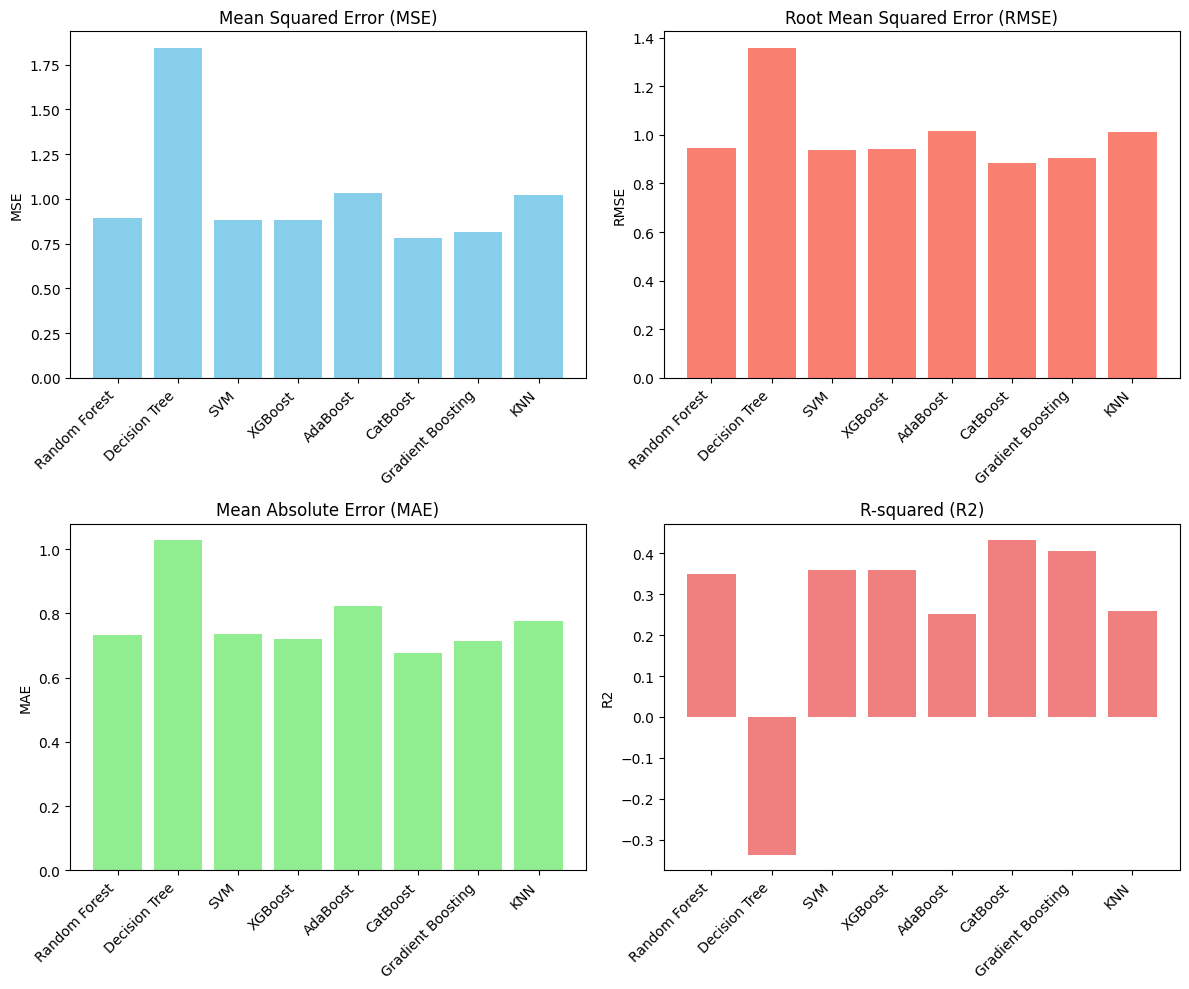

In [1]:
import matplotlib.pyplot as plt

# Data
algorithms = ['Random Forest', 'Decision Tree', 'SVM', 'XGBoost', 'AdaBoost', 'CatBoost', 'Gradient Boosting', 'KNN']
mse = [0.896, 1.844, 0.883, 0.883, 1.031, 0.781, 0.818, 1.021]
rmse = [0.946, 1.358, 0.939, 0.940, 1.016, 0.884, 0.905, 1.010]
mae = [0.733, 1.027, 0.736, 0.720, 0.823, 0.677, 0.713, 0.777]
r2 = [0.351, -0.337, 0.360, 0.360, 0.252, 0.434, 0.407, 0.260]

# Plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# MSE plot
axs[0, 0].bar(algorithms, mse, color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')

# RMSE plot
axs[0, 1].bar(algorithms, rmse, color='salmon')
axs[0, 1].set_title('Root Mean Squared Error (RMSE)')
axs[0, 1].set_ylabel('RMSE')

# MAE plot
axs[1, 0].bar(algorithms, mae, color='lightgreen')
axs[1, 0].set_title('Mean Absolute Error (MAE)')
axs[1, 0].set_ylabel('MAE')

# R2 plot
axs[1, 1].bar(algorithms, r2, color='lightcoral')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_ylabel('R2')

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(algorithms, rotation=45, ha='right')

plt.tight_layout()
plt.show()
